10. Design a basic CNN in Keras for image classification using the CIFAR-10dataset. Include convolutional, pooling, and dense layers.

In [1]:
# ----------------------------
# 1. Import required libraries
# ----------------------------
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [2]:
# ----------------------------
# 2. Load and preprocess CIFAR-10 dataset
# ----------------------------
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [3]:
# ----------------------------
# 3. Define the CNN architecture
# ----------------------------
model = models.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 3
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten + Fully Connected Layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# ----------------------------
# 4. Compile the model
# ----------------------------
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [5]:
# ----------------------------
# 5. Display the model summary
# ----------------------------
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# ----------------------------
# 6. Train the model
# ----------------------------
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test)
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 89ms/step - accuracy: 0.3354 - loss: 1.7920 - val_accuracy: 0.5211 - val_loss: 1.3292
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 89ms/step - accuracy: 0.5444 - loss: 1.2749 - val_accuracy: 0.5893 - val_loss: 1.1526
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.6070 - loss: 1.1096 - val_accuracy: 0.6028 - val_loss: 1.1290
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 90ms/step - accuracy: 0.6442 - loss: 1.0095 - val_accuracy: 0.6469 - val_loss: 0.9916
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 93ms/step - accuracy: 0.6825 - loss: 0.9114 - val_accuracy: 0.6544 - val_loss: 0.9788
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 88ms/step - accuracy: 0.7055 - loss: 0.8480 - val_accuracy: 0.6955 - val_loss: 0.8980
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.7225 - loss: 0.7914 - val_accuracy: 0.6873 - val_loss: 0.9207
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.7375 - loss: 0.7576 - 

In [10]:
# ----------------------------
# 7. Evaluate the model
# ----------------------------
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"✅ Test Accuracy: {test_acc:.4f}")

313/313 - 5s - 15ms/step - accuracy: 0.6932 - loss: 0.9134
✅ Test Accuracy: 0.6932


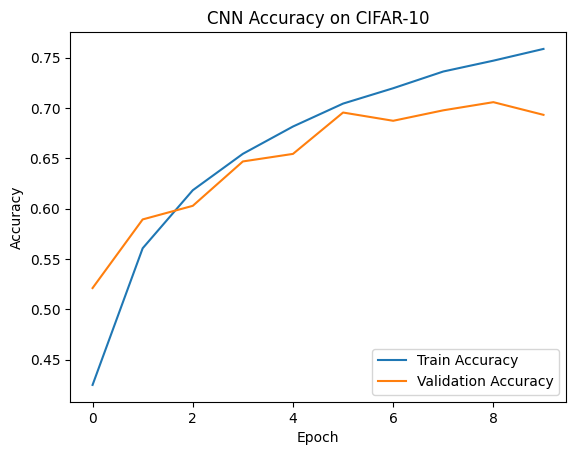

In [11]:
# ----------------------------
# 8. Plot training & validation accuracy
# ----------------------------
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('CNN Accuracy on CIFAR-10')
plt.show()

| Step                    | Description                                                                                                                                                                           |
| ----------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **1. Import Libraries** | TensorFlow/Keras for model building and Matplotlib for visualization.                                                                                                                 |
| **2. Dataset Loading**  | CIFAR-10 is automatically downloaded and split into train/test sets.                                                                                                                  |
| **3. CNN Architecture** | - `Conv2D` layers extract features from images.<br> - `MaxPooling2D` reduces spatial dimensions.<br> - `Flatten` converts 2D maps to 1D.<br> - `Dense` layers perform classification. |
| **4. Compilation**      | Uses Adam optimizer, sparse categorical crossentropy (for integer labels), and accuracy metric.                                                                                       |
| **5. Training**         | Runs for 10 epochs; you can increase for better performance.                                                                                                                          |
| **6. Evaluation**       | Prints test accuracy.                                                                                                                                                                 |
| **7. Visualization**    | Plots accuracy trends during training.                                                                                                                                                |
